# Семинар 6: спектральная теория стационарности

**Спектральная теория стационарности** позволяет рассматривать стационарные процессы с позиции разложения на гармоники.
Такой подход упрощает решение некоторых задач.
Например, линейные дифференциальные уравнения в случае стационарных процессов можно свести к линейным алгебраическим
(по аналогии с обычными дифференциальными уравнениями после преобразования Фурье/Лапласа).

Говоря более формально, для стационарного процесса $ X $ можно записать следующие разложения:

$$
    X_t = \mathbb{E} X_t + \int_{\mathbb{R}} e^{i \lambda t} \, dV_X(\lambda),
    \qquad
    R_X(\tau) = \int_{\mathbb{R}} e^{i \lambda \tau} \, dS_X(\lambda),
$$

где $ V_X(\lambda) $ - процесс с ортогональными приращениями, $ dS_X(\lambda) = \mathbb{E} |dV_X(\lambda)|^2 $ - дифференциал **спектральной функции**.
В случае, когда спектральная функция абсолютно непрерывна, её дифференциал можно выразить через **спектральную плотность**: $ dS_X(\lambda) = s_X(\lambda) \cdot d\lambda $.

В чём смысл спектральной функции/спектральной плотности?
Стационарный процесс можно представить в виде совокупности множества нескоррелированных
стационарных процессов с гармоническими корреляционными функциями ($ e^{i \lambda \tau} $ или просто $ \cos(\lambda \tau) $).
Спектральная плотность обозначает "вес" (в смысле $ \mathbb{L}_2 $) той или иной "гармоники" в общем "сигнале".
Иначе говоря, стационарный процесс можно разложить на процессы, сечения которых по гармоническому закону то коррелируют, то не коррелируют при увеличении промежутка времени между ними.

Промоделируем простой гауссовский процесс, составленный из трёх таких "гармоник":

$$
    m_X(t) = 0,
    \qquad
    R_X(\tau) = \frac{1}{4} \cos(\tau/4) + \frac{1}{4} \cos(2 \tau) + \frac{1}{2} \cos(3 \tau)
$$

In [1]:
import numpy as np
import pandas as pd

# Фиксируем зерно для генертора случайных чисел.
np.random.seed(seed=42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size' : 14}
matplotlib.rc('font', **font)

In [3]:
# Раскомментировать, если следующая ячейка не работает.
#import sys
#sys.path.insert(1, ".")

In [4]:
from utils.plots import plot_realizations, plot_slices, plot_correlation_function, plot_realizations_heatmap
from utils.processes import generate_wiener, generate_gaussian

In [5]:
mean_func = lambda T : np.zeros_like(T)
def correlation_func(T: np.array):
    Tau = T[None,:] - T[:,None]
    
    # Добавка 1e-6 нужна для численной регуляризации; без неё ковариационная матрица получается вырожденной.
    return 1e-6 * np.identity(T.shape[0]) + 0.25 * np.cos(0.25 * Tau) + 0.25 * np.cos(2.0 * Tau) + 0.5 * np.cos(3.0 * Tau)

T_oscillating_gaussian = np.linspace(0.0, 6.0 * np.pi, 300)
oscillating_gaussian_realizations = generate_gaussian(T_oscillating_gaussian, mean_func, correlation_func, realizations_number=1000)

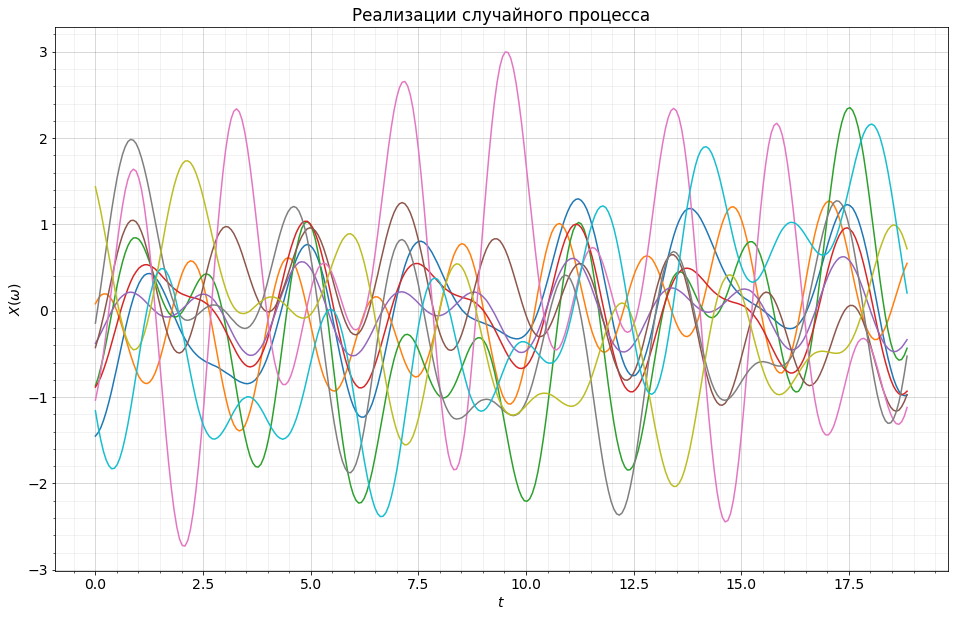

In [6]:
plot_realizations(T_oscillating_gaussian, oscillating_gaussian_realizations[:10])

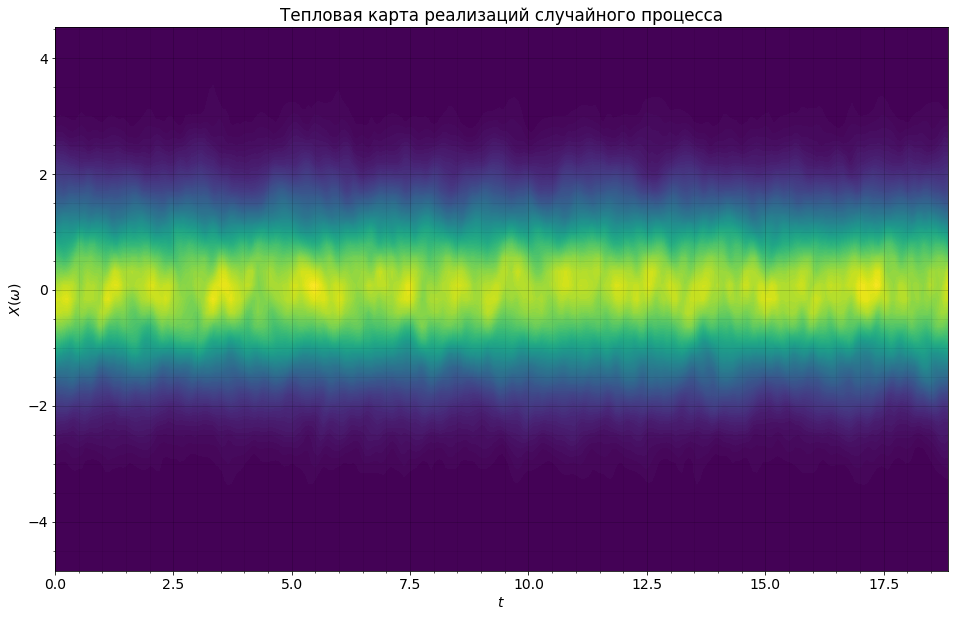

In [7]:
plot_realizations_heatmap(T_oscillating_gaussian, oscillating_gaussian_realizations, levels=100)

Эффект осццилирующей скоррелированности на графиках реализаций не виден.
Это следует из того факта, что осцилляция происходит не во времени, а при увеличении $ \tau = t - s $ - сдвига между двумя выбранными сечениями.

Отцентрируем все реализации так, чтобы сечение в нулевой момент времени было равно нулю:

In [8]:
oscillating_gaussian_realizations_shifted = oscillating_gaussian_realizations - oscillating_gaussian_realizations[:,0,None]

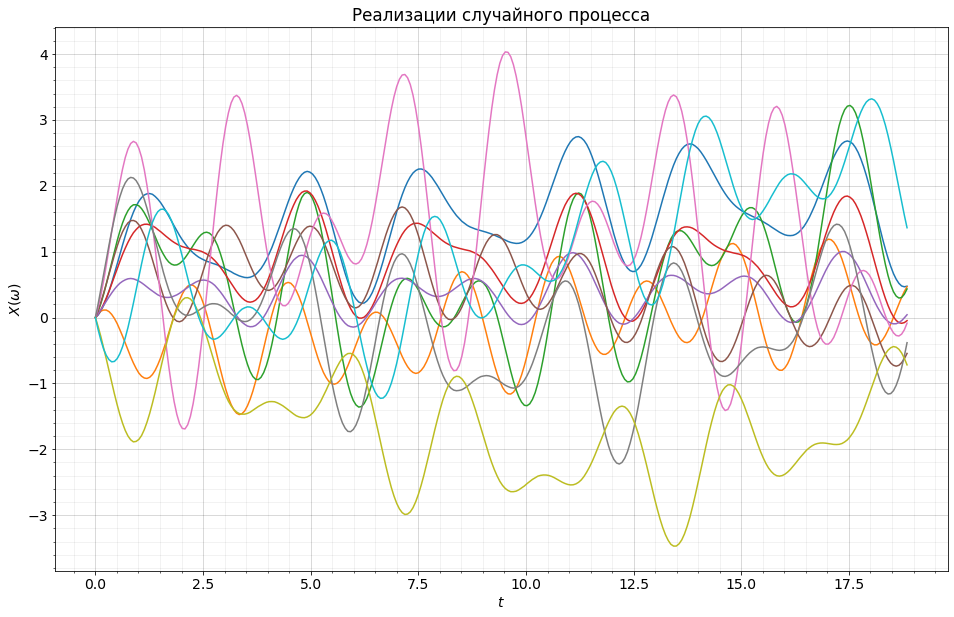

In [9]:
plot_realizations(T_oscillating_gaussian, oscillating_gaussian_realizations_shifted[:10])

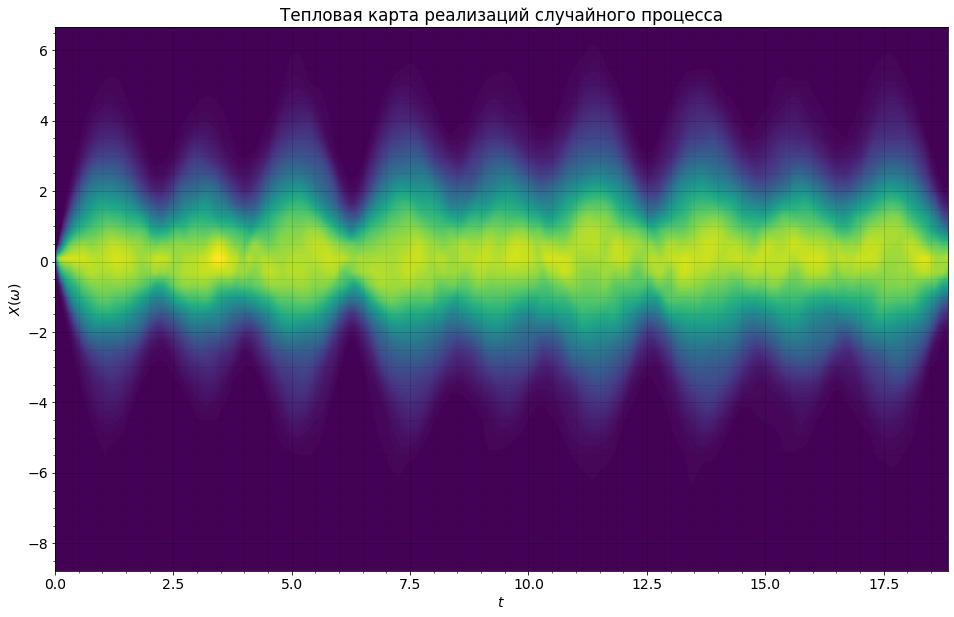

In [10]:
plot_realizations_heatmap(T_oscillating_gaussian, oscillating_gaussian_realizations_shifted, levels=100)

Теперь осцилляции видны невооружённым глазом.

Рассмотрим теперь слегка изменённый стационарный процесс из предыдущего семинара.
Он уже не представляется в виде конечной суммы "гармоник":

$$
    m_X(t) = 0, \qquad R(t, s) = R(t - s) = R(\tau) = e^{-\frac{\tau^2}{100}} \cos(\tau)
$$

In [11]:
mean_func = lambda T : np.zeros_like(T)
def correlation_func(T: np.array):
    Tau = T[None,:] - T[:,None]
    
    # Добавка 1e-6 нужна для численной регуляризации; без неё ковариационная матрица получается вырожденной.
    return 1e-6 * np.identity(T.shape[0]) + np.exp(-0.01 * Tau**2) * np.cos(Tau)

T_cos_gaussian = np.linspace(0.0, 6.0 * np.pi, 100)
cos_gaussian_realizations = generate_gaussian(T_cos_gaussian, mean_func, correlation_func, realizations_number=1000)

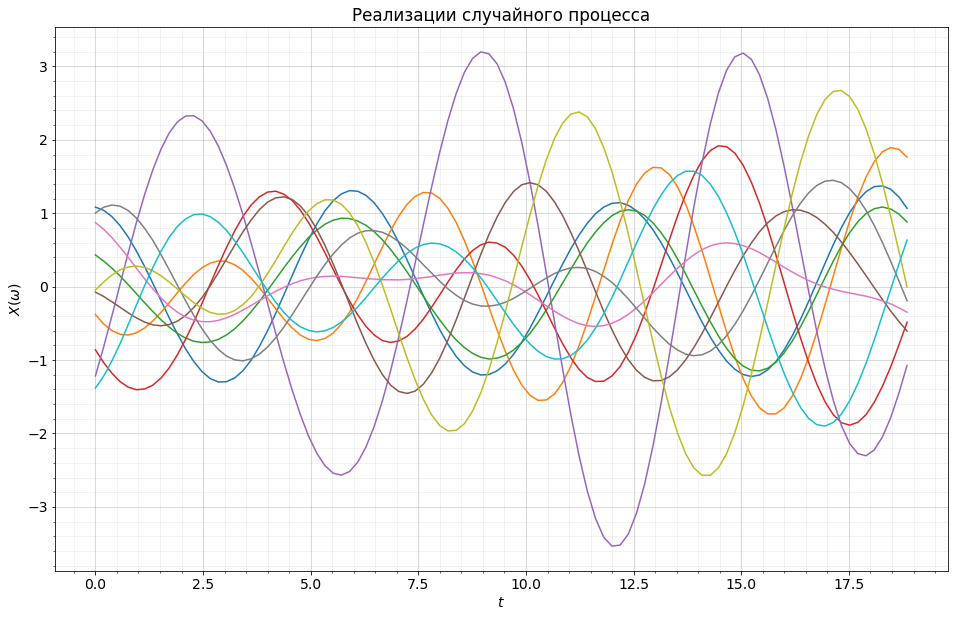

In [12]:
plot_realizations(T_cos_gaussian, cos_gaussian_realizations[:10])

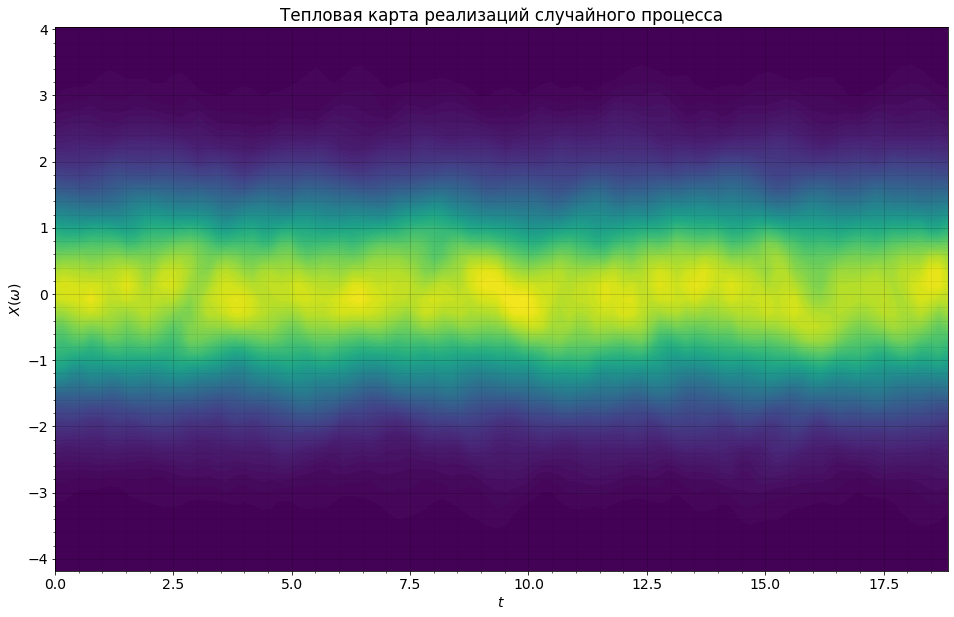

In [13]:
plot_realizations_heatmap(T_cos_gaussian, cos_gaussian_realizations, levels=100)

Аналогично, никакие гармоники в усреднённой картине траекторий изначально не прослеживаются.

Отцентрируем все реализации так, что сечение в нулевой момент времени равно нулю:

In [14]:
cos_gaussian_realizations_shifted = cos_gaussian_realizations - cos_gaussian_realizations[:,0,None]

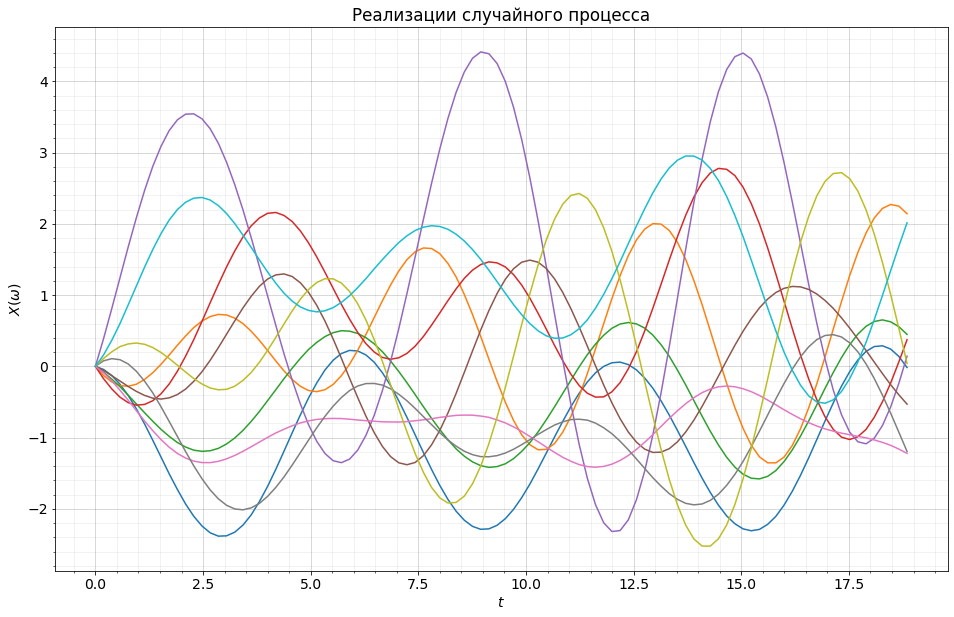

In [15]:
plot_realizations(T_cos_gaussian, cos_gaussian_realizations_shifted[:10])

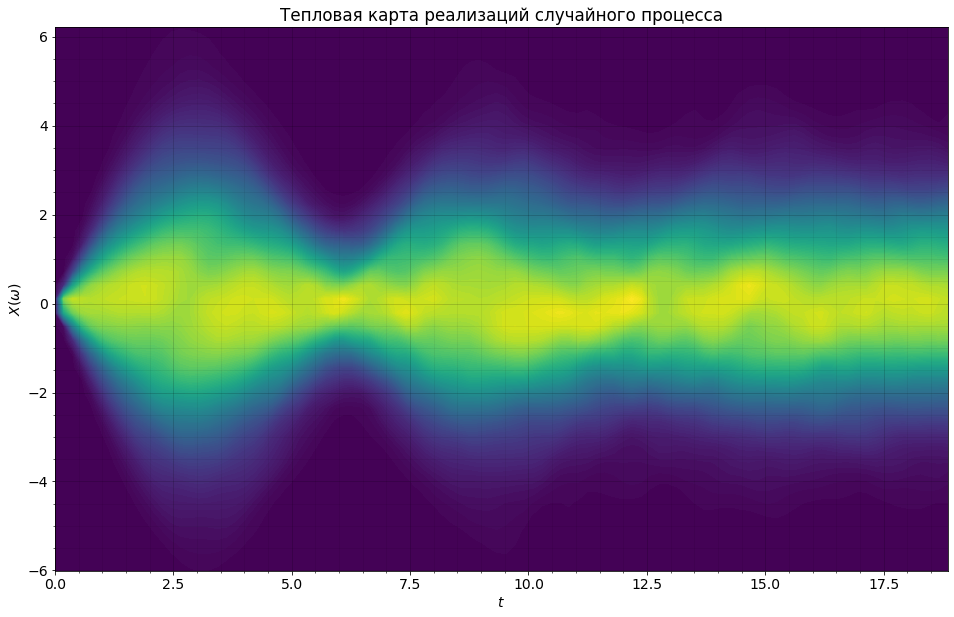

In [16]:
plot_realizations_heatmap(T_cos_gaussian, cos_gaussian_realizations_shifted, levels=100)